# Titanic  DataSet 

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

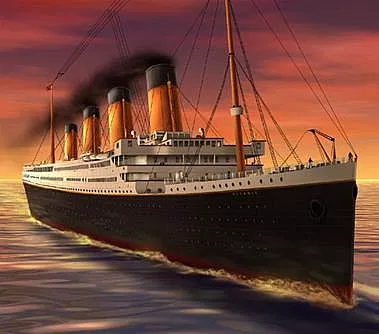

##  Step -1. Exploratory Data Analysis

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. EDA is different from initial data analysis (IDA), which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA.

### Why EDA?
- to summarize our data and get familier with data.
- to find hidden patterns and to prepare our data for machine learning.

### Data Description

#### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
%matplotlib inline
sns.set()

C:\Users\Harsh\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Harsh\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Harsh\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Harsh\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\Har

#### Importing data

In [2]:
tda = pd.read_csv("https://raw.githubusercontent.com/harsh22chauhan/Data-Sets/master/train.csv")
#tdatest = pd.read_csv("")
#combine = [tda,tdatest]

In [3]:
tda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tda.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
tda.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Examining the data

In [6]:
tda.shape

(891, 12)

In [7]:
tda.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Insights

- total samples are 891 or 40% of the actual no. of passengers on the board titatnic(2214)

### Data Report

In [8]:
preprofile = pandas_profiling.ProfileReport(tda)
preprofile

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


- data profiling is a very important task before data preprocessing.

### Data preprocessing
- check for errors and null values.
- replace null values with appropiate values.
- drop irrelevant fetures,not relevant.
- add relevant features.

#### check for null values

In [9]:
miss1 = tda.isnull().sum()
miss1

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, cabin, Embarked has missing values lets fix them.

In [10]:
new_age = tda.Age.median()
tda.Age.fillna(new_age,inplace = True) # fill by median.

In [11]:
tda.Embarked = tda.Embarked.fillna(tda['Embarked'].mode()[0]) #fill by mode

In [12]:
tda.drop('Cabin',axis = 1,inplace = True) #contains so many null values.

In [13]:
tda.drop('PassengerId',axis = 1,inplace = True) # not contribute to survival.

In [14]:
tda.drop('Ticket',axis = 1,inplace = True) 

In [15]:
tda.drop('Name',axis = 1,inplace = True)

### Creating New Fields

#### AGE-BAND

In [16]:
tda['age_band']=0
tda.loc[tda['Age']>0,'Age_band'] = 'Infant'
tda.loc[(tda['Age']>1)&(tda['Age']<=12),'Age_band'] = 'children'
tda.loc[tda['Age']>12,'Age_band'] = 'Adults'
tda.drop('age_band',inplace = True,axis = 1)

In [17]:
tda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_band
0,0,3,male,22.0,1,0,7.2500,S,Adults
1,1,1,female,38.0,1,0,71.2833,C,Adults
2,1,3,female,26.0,0,0,7.9250,S,Adults
3,1,1,female,35.0,1,0,53.1000,S,Adults
4,0,3,male,35.0,0,0,8.0500,S,Adults


In [18]:
tda.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [19]:
tda['Fareband']=0
tda.loc[(tda['Fare']>=0)&(tda['Fare']<=15),'Fareband']= 'low'
tda.loc[(tda['Fare']>15)&(tda['Fare']<=35),'Fareband']= 'Medium'
tda.loc[(tda['Fare']>35),'Fareband']= 'High'

In [20]:
tda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_band,Fareband
0,0,3,male,22.0,1,0,7.2500,S,Adults,low
1,1,1,female,38.0,1,0,71.2833,C,Adults,High
2,1,3,female,26.0,0,0,7.9250,S,Adults,low
3,1,1,female,35.0,1,0,53.1000,S,Adults,High
4,0,3,male,35.0,0,0,8.0500,S,Adults,low


In [21]:
for i in tda:
    tda['Familysize'] = tda['SibSp'] + tda['Parch']+1

In [22]:
tda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_band,Fareband,Familysize
0,0,3,male,22.0,1,0,7.2500,S,Adults,low,2
1,1,1,female,38.0,1,0,71.2833,C,Adults,High,2
2,1,3,female,26.0,0,0,7.9250,S,Adults,low,1
3,1,1,female,35.0,1,0,53.1000,S,Adults,High,2
4,0,3,male,35.0,0,0,8.0500,S,Adults,low,1


## Post pandas profiling : checking data after data preparation.

In [23]:
postprofile = pandas_profiling.ProfileReport(tda)
postprofile

Number of variables,11
Number of observations,891
Total Missing (%),0.0%
Total size in memory,76.6 KiB
Average record size in memory,88.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),0
Rejected,0


Here, In Exploratory Data Analysis , we gets insights of our data.
We also performed operation for Missing Values, cleaned Our data and also create some new variables for better understanding of data.

## Step-2. Data Visualization

1. What is total counts of survival and victims?

In [24]:
tda.groupby(['Survived'])['Survived'].count() #unique(),sum(),mean()etc

Survived
0    549
1    342
Name: Survived, dtype: int64

Text(0,0.5,'Passenger Count')

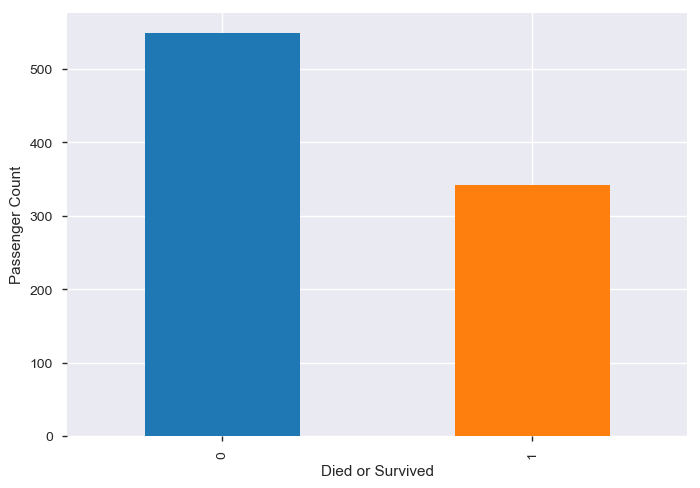

In [25]:
plt = tda.Survived.value_counts().plot('bar')
plt.set_xlabel('Died or Survived')
plt.set_ylabel('Passenger Count')

- less than 50% passengers are survived.
- There is less chances of survival.

### Which gender has more survival rate?

In [26]:
tda.groupby(['Survived','Sex']).count()['Age']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Age, dtype: int64

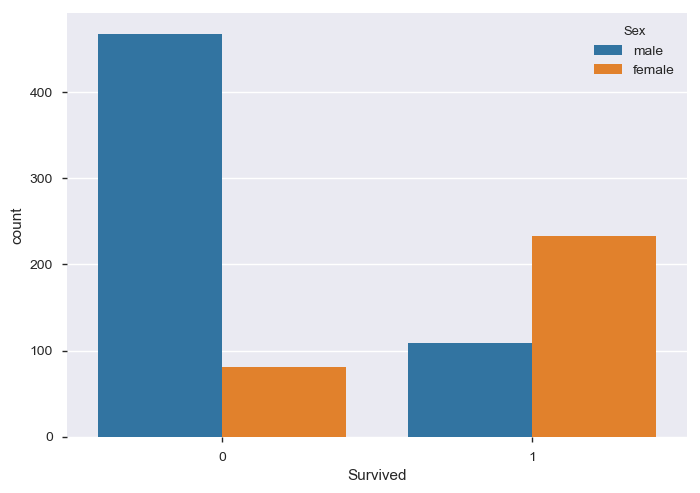

In [27]:
sns.countplot('Survived',
              hue= 'Sex',
              data=tda)

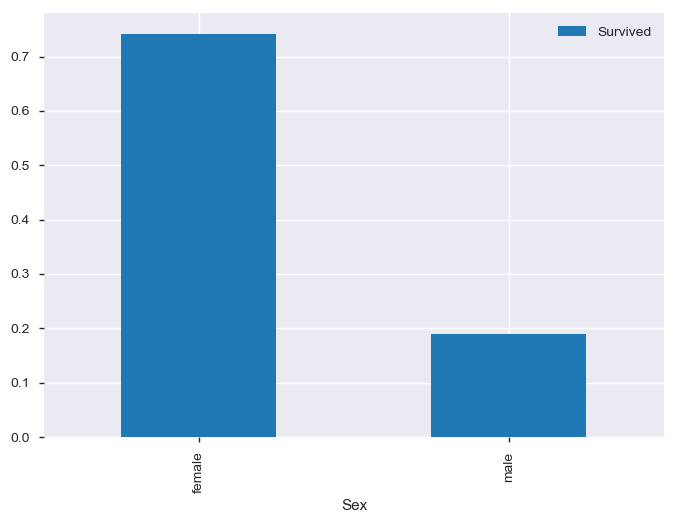

In [28]:
tda[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

- Female Survival rate is more as compared to Male

### what is survival rate based on person type?

In [29]:
tda.groupby(['Survived','Age_band']).count()['Sex']

Survived  Age_band
0         Adults      520
          Infant        2
          children     27
1         Adults      302
          Infant       12
          children     28
Name: Sex, dtype: int64

Text(0.5,1,'Adult survival rate')

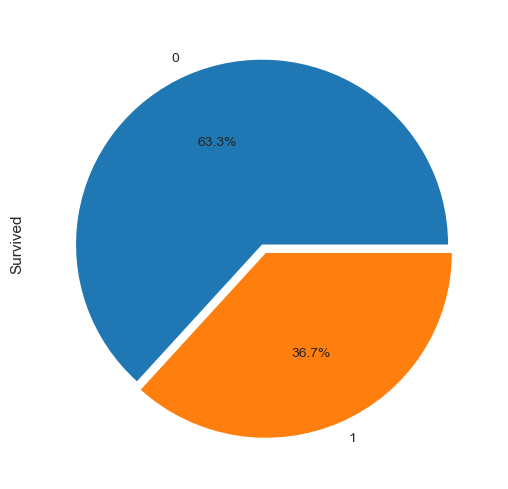

In [30]:
tda[tda['Age_band']=='Adults'].Survived.groupby(tda.Survived).count().plot(kind= 'pie',
                                                                           figsize=(6,6),
                                                                           explode=[0,0.05],
                                                                           autopct='%1.1f%%')
plt.axis('equal')
plt.set_title("Adult survival rate")

Text(0.5,1,'Adult survival rate')

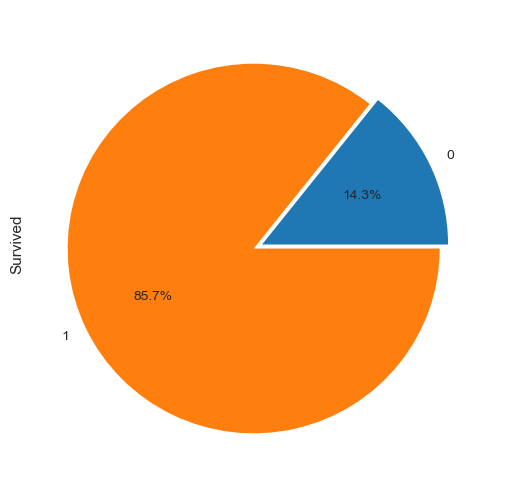

In [31]:
tda[tda['Age_band']=='Infant'].Survived.groupby(tda.Survived).count().plot(kind= 'pie',
                                                                           figsize=(6,6),
                                                                           explode=[0,0.05],
                                                                           autopct='%1.1f%%')
plt.axis('equal')
plt.set_title("Adult survival rate")

#### Did economy class had impact on survival rate ?

In [32]:
tda.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

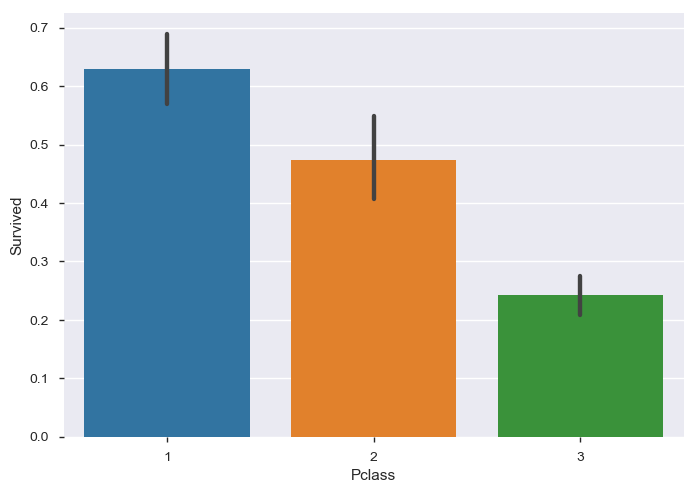

In [33]:
sns.barplot(x ='Pclass',
           y = 'Survived',
            data = tda)


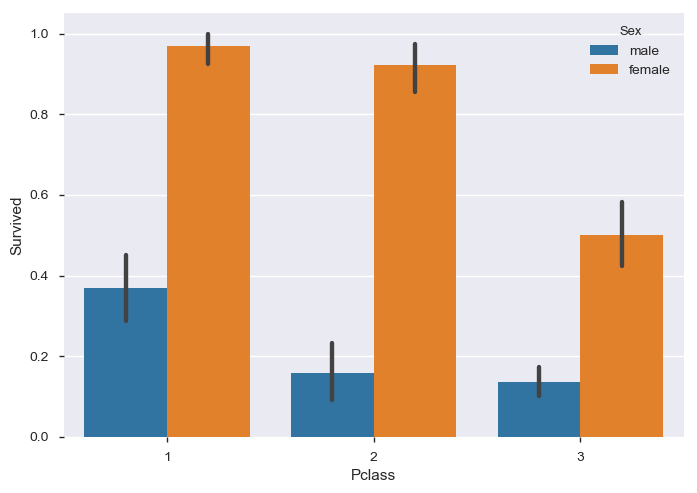

In [34]:
sns.barplot(x ='Pclass',
           y = 'Survived',
            hue = 'Sex',
           data = tda)

### What is the probability of embarkment 

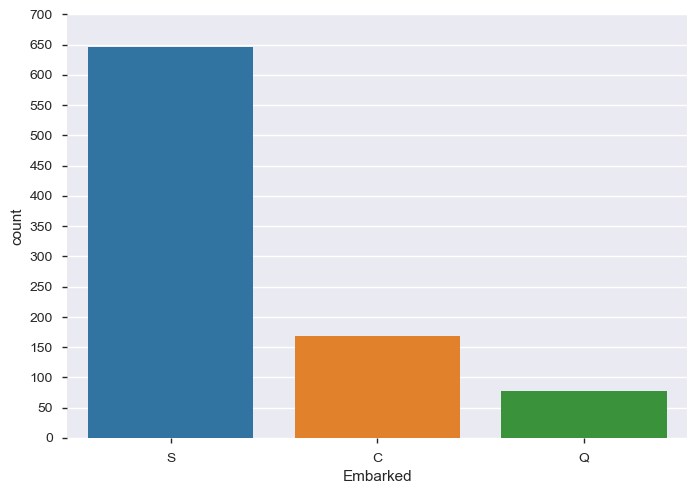

In [35]:
from matplotlib.pyplot import xticks
ax = sns.countplot('Embarked',data=tda)
ax.set_yticks([t*50 for t in range(0,15)])

In [36]:
pd.crosstab([tda.Sex,tda.Survived,tda.Pclass],[tda.Embarked],margins=True)

Embarked                  C   Q    S  All
Sex    Survived Pclass                   
female 0        1         1   0    2    3
                2         0   0    6    6
                3         8   9   55   72
       1        1        42   1   48   91
                2         7   2   61   70
                3        15  24   33   72
male   0        1        25   1   51   77
                2         8   1   82   91
                3        33  36  231  300
       1        1        17   0   28   45
                2         2   0   15   17
                3        10   3   34   47
All                     168  77  646  891

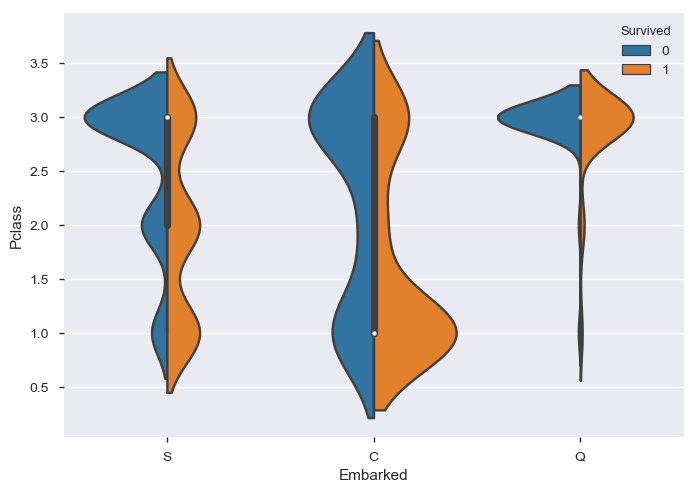

In [37]:
sns.violinplot(x= 'Embarked',
              y='Pclass',
              hue= 'Survived',
              data= tda,
              split = True)

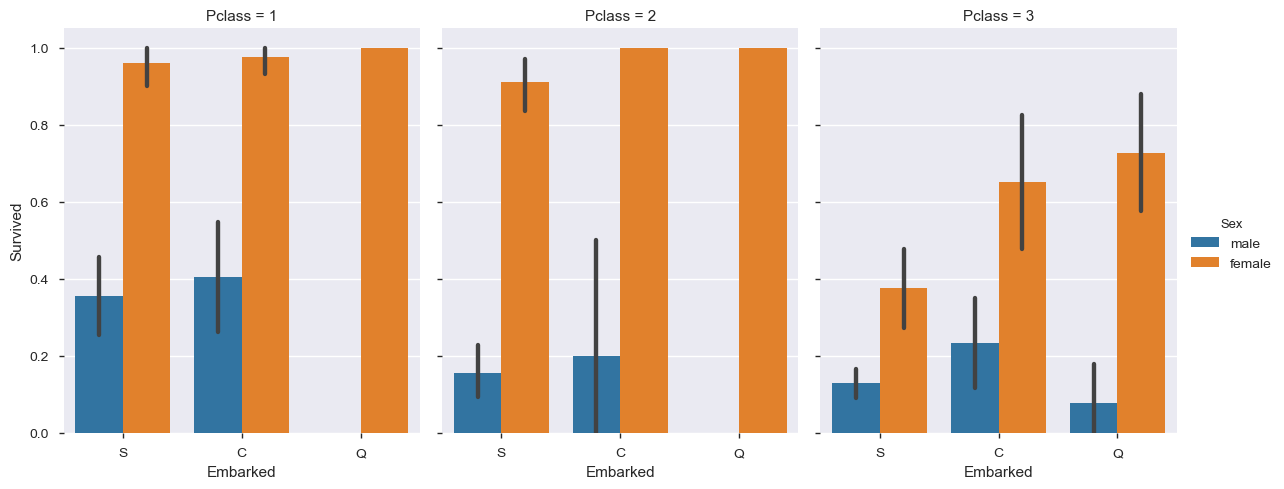

In [38]:
sns.catplot(x='Embarked',
           y='Survived',
           hue='Sex',
           col='Pclass',aspect=0.8,kind='bar',
           data = tda)

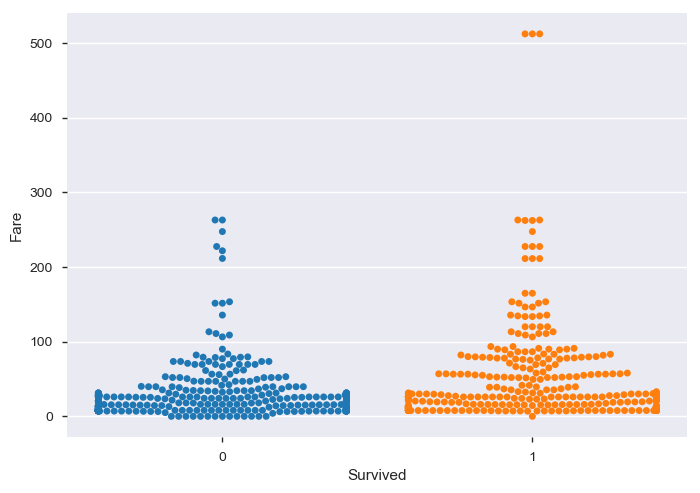

In [39]:
sns.swarmplot(x='Survived',
              y='Fare',
             data=tda)

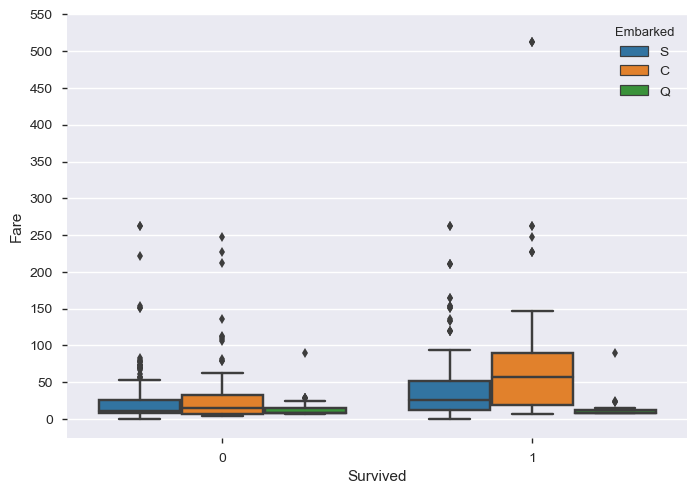

In [40]:
bx = sns.boxplot(x='Survived',
              y='Fare',
            hue= 'Embarked',
             data=tda)
bx.set_yticks([t*50 for t in range(0,12)])

Text(0.5,1.08,'Age Distribution')

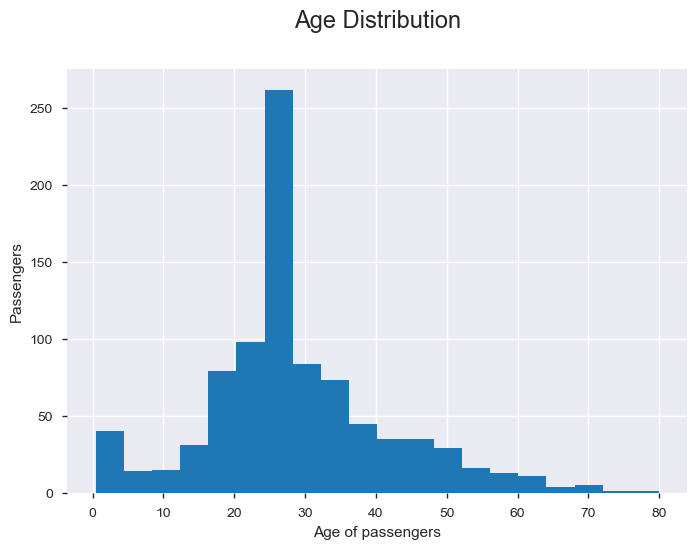

In [41]:
plt = tda['Age'].hist(bins=20)
plt.set_ylabel('Passengers')
plt.set_xlabel('Age of passengers')
plt.set_title('Age Distribution',size = 17,y=1.08)

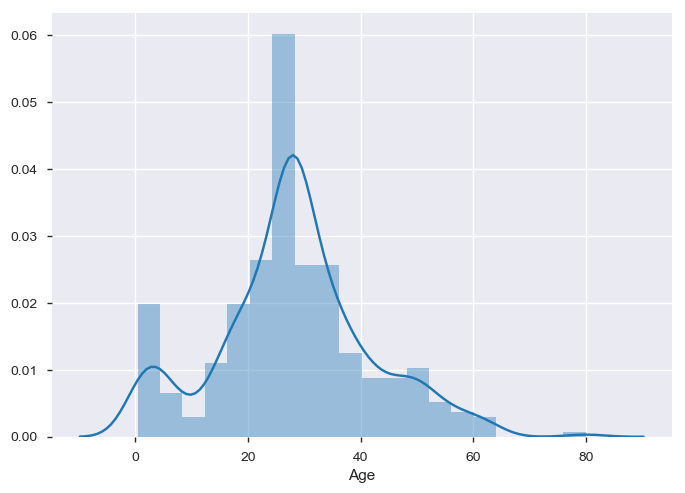

In [42]:
sns.distplot(tda[tda['Survived']==1]['Age'])

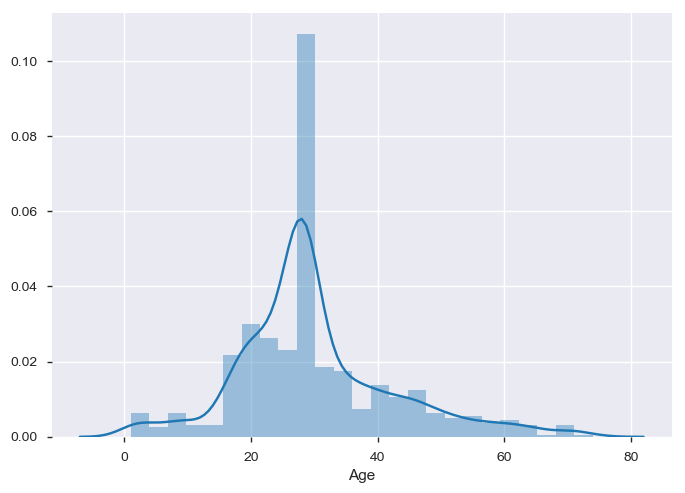

In [43]:
sns.distplot(tda[tda['Survived']==0]['Age'])

In [44]:
tda['FamilySize']=0
tda['FamilySize']=tda['Parch']+tda['SibSp']

tda['Solopassenger']=0
tda.loc[tda.FamilySize == 0 ,'Solopassenger']=1

C:\Users\Harsh\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


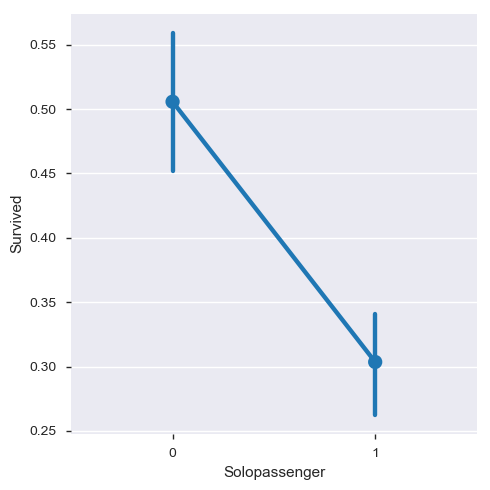

In [45]:
sns.factorplot('Solopassenger','Survived',data=tda)

C:\Users\Harsh\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


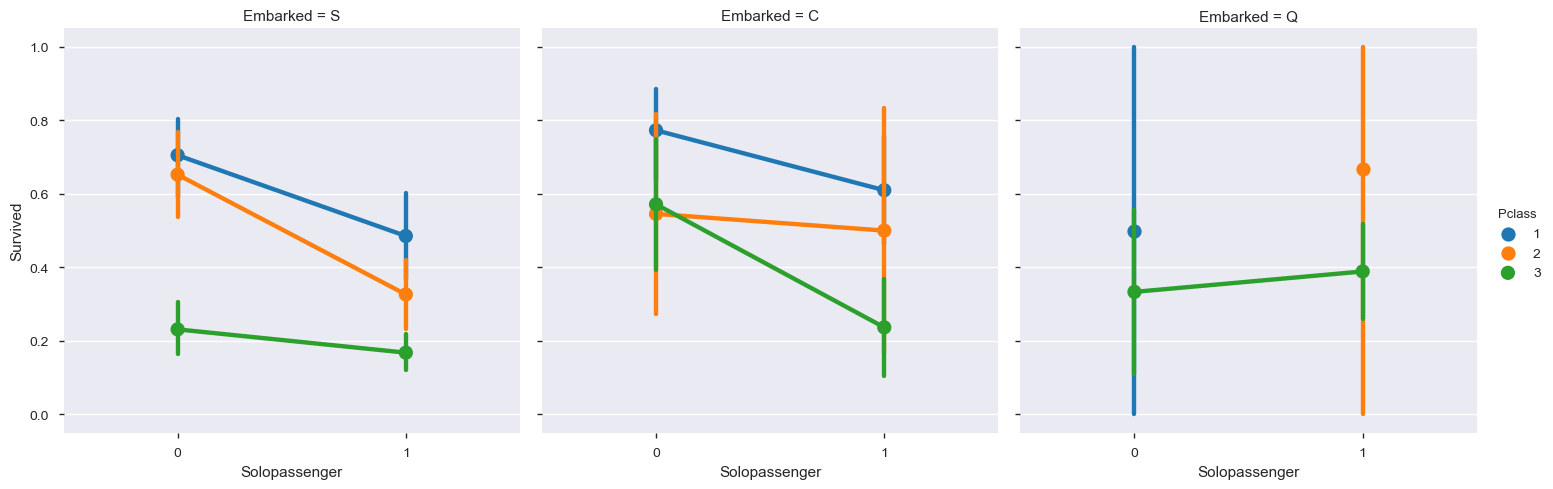

In [46]:
sns.factorplot('Solopassenger',
               'Survived',
               hue = 'Pclass',
               col='Embarked',
               data=tda)

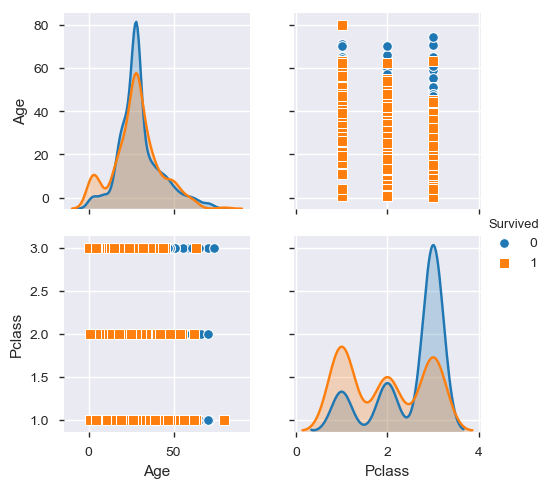

In [47]:
sns.pairplot(tda[['Age','Pclass','Survived']],
             vars=['Age','Pclass'],
             hue='Survived',
             dropna= True,
             markers=['o','s'])


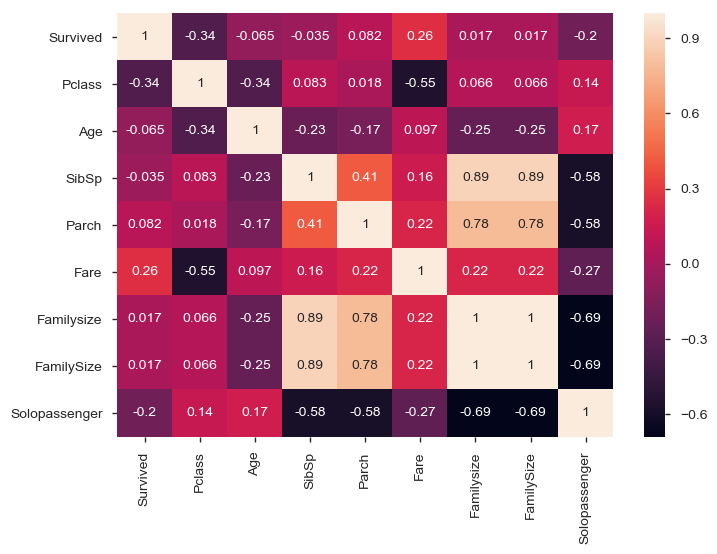

In [48]:
sns.heatmap(tda.corr(),annot=True)

##### In Data Visualization, We tried to find out the pattern between the different variables.

## Step-3. Machine Learning

In [49]:
tda.shape

(891, 13)

In [50]:
tda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_band,Fareband,Familysize,FamilySize,Solopassenger
0,0,3,male,22.0,1,0,7.2500,S,Adults,low,2,1,0
1,1,1,female,38.0,1,0,71.2833,C,Adults,High,2,1,0
2,1,3,female,26.0,0,0,7.9250,S,Adults,low,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,Adults,High,2,1,0
4,0,3,male,35.0,0,0,8.0500,S,Adults,low,1,0,1


### Creating Dummy Variables.

Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. This means that we don't need to write out separate equation models for each subgroup. The dummy variables act like 'switches' that turn various parameters on and off in an equation.

In [51]:
tda['Fareband'],unique1 = pd.factorize(tda['Fareband'])
print(unique1)

Index(['low', 'High', 'Medium'], dtype='object')


In [52]:
tda['Ageband'],unique2 = pd.factorize(tda['Age_band'])
print(unique2)

Index(['Adults', 'children', 'Infant'], dtype='object')


In [53]:
tda.drop('Age_band',axis = 1,inplace = True)

In [54]:
tda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fareband,Familysize,FamilySize,Solopassenger,Ageband
0,0,3,male,22.0,1,0,7.2500,S,0,2,1,0,0
1,1,1,female,38.0,1,0,71.2833,C,1,2,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,2,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,1,0


In [55]:
b = pd.get_dummies(tda['Embarked'],drop_first = True)

In [56]:
b.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [57]:
tda = pd.concat([tda,b],axis = 1)

In [58]:
tda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fareband,Familysize,FamilySize,Solopassenger,Ageband,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,2,1,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,2,1,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,2,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,1,0,0,1


In [59]:
c = pd.get_dummies(tda['Sex'],drop_first = True)

In [60]:
c.head()

,male
0,1
1,0
2,0
3,0
4,1


In [61]:
tda = pd.concat([tda,c],axis =1)

In [62]:
tda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fareband,Familysize,FamilySize,Solopassenger,Ageband,Q,S,male
0,0,3,male,22.0,1,0,7.2500,S,0,2,1,0,0,0,1,1
1,1,1,female,38.0,1,0,71.2833,C,1,2,1,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,0,1,0,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,2,1,0,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,1,0,0,1,1


####  Remove columns for which we created dummy variables.

In [63]:
tda.drop('Sex',axis=1,inplace = True)
tda.drop('Embarked',axis = 1,inplace = True)
tda.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Fareband,Familysize,FamilySize,Solopassenger,Ageband,Q,S,male
0,0,3,22.0,1,0,7.2500,0,2,1,0,0,0,1,1
1,1,1,38.0,1,0,71.2833,1,2,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,1,0,0,1,0
3,1,1,35.0,1,0,53.1000,1,2,1,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,0,1,0,0,1,1


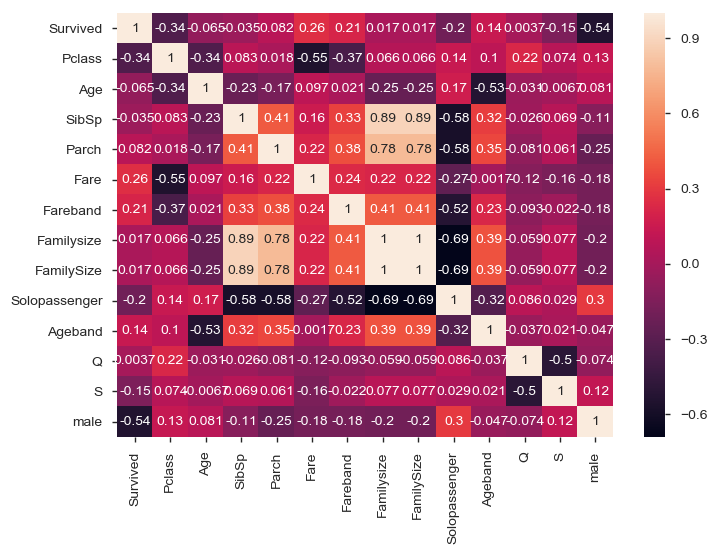

In [64]:
sns.heatmap(tda.corr(),annot = True) # correlation plot for finding Correlation between the variables.

### Spliting of data
we split our data into two parts 
1. Train (for model Training)
2. Test  (for model Testing)

In [65]:
x = tda.iloc[:,1:]
y = tda.iloc[:,0]

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3,random_state = 0)

### 1. Logistic Regression.

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [68]:
reg = LogisticRegression()
model = reg.fit(x_train,y_train)
y_predi = reg.predict(x_test)
acc_log = round(accuracy_score(y_predi,y_test)*100,2)

print("Accuracy of Model:",acc_log)

Accuracy of Model: 80.97


C:\Users\Harsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_predi))
print(classification_report(y_test,y_predi))

[[146  22]
 [ 29  71]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       168
           1       0.76      0.71      0.74       100

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



## 2.  KNN
K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data (as opposed to other algorithms such as GMM, which assume a Gaussian distribution of the given data).

We are given some prior data (also called training data), which classifies coordinates into groups identified by an attribute.

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
## Training / model fitting

# train the decision tree
## Instantiate the model with 5 neighbors.
model = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
## Model parameters study :
from sklearn.metrics import accuracy_score
# use the model to make predictions with the test data
y_pred = model.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
#accuracy = metrics.accuracy_score(y_test, y_pred)
#print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 71


In [73]:
from sklearn.metrics import accuracy_score
for K in range(20):
  K_value = K+1
  neigh = KNeighborsClassifier(n_neighbors = K_value)
  neigh.fit(x_train, y_train)
  y_pred = neigh.predict(x_test)
  print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  71.26865671641791 % for K-Value: 1
Accuracy is  71.64179104477611 % for K-Value: 2
Accuracy is  69.77611940298507 % for K-Value: 3
Accuracy is  72.01492537313433 % for K-Value: 4
Accuracy is  73.50746268656717 % for K-Value: 5
Accuracy is  72.01492537313433 % for K-Value: 6
Accuracy is  71.26865671641791 % for K-Value: 7
Accuracy is  73.13432835820896 % for K-Value: 8
Accuracy is  73.50746268656717 % for K-Value: 9
Accuracy is  70.8955223880597 % for K-Value: 10
Accuracy is  75.3731343283582 % for K-Value: 11
Accuracy is  74.25373134328358 % for K-Value: 12
Accuracy is  73.88059701492537 % for K-Value: 13
Accuracy is  74.25373134328358 % for K-Value: 14
Accuracy is  72.76119402985076 % for K-Value: 15
Accuracy is  73.88059701492537 % for K-Value: 16
Accuracy is  73.88059701492537 % for K-Value: 17
Accuracy is  74.6268656716418 % for K-Value: 18
Accuracy is  75.0 % for K-Value: 19
Accuracy is  74.6268656716418 % for K-Value: 20


In [74]:
model = KNeighborsClassifier(n_neighbors=11)
## Fit the model on the training data.
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  74.6268656716418


In [75]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_predict))

[[151  17]
 [ 51  49]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       168
           1       0.72      0.56      0.63       100

   micro avg       0.75      0.75      0.75       268
   macro avg       0.74      0.71      0.72       268
weighted avg       0.75      0.75      0.75       268



## 3. Decision Tree 

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

In [76]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
y_pred = classifier.predict(x_test)
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.7873134328358209


## Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [79]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8171641791044776


In [83]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Fareband',
       'Familysize', 'FamilySize', 'Solopassenger', 'Ageband', 'Q', 'S',
       'male']

In [89]:
feature_imp = pd.Series(clf.feature_importances_,index = features).sort_values(ascending=False)
feature_imp


male             0.252734
Age              0.242015
Fare             0.212963
Pclass           0.076594
Familysize       0.034939
FamilySize       0.033224
Fareband         0.032373
S                0.026476
Ageband          0.026471
SibSp            0.024139
Parch            0.015097
Q                0.012731
Solopassenger    0.010244
dtype: float64

No handles with labels found to put in legend.


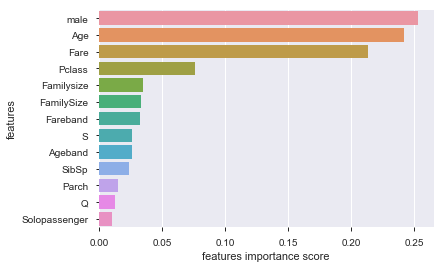

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('features importance score')
plt.ylabel('features')
plt.legend()
plt.show()